In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np




In [2]:
# Step 1: Read data without date parsing
df = pd.read_csv('household_power_consumption.txt', 
                 sep=';', 
                 na_values=['?'], 
                 low_memory=False)

# Step 2: Combine and convert Date + Time manually
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Optional: Set Datetime as index if needed
df.set_index('Datetime', inplace=True)

# Step 3: Drop the original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Preview
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
# Check data types and missing values
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1

In [5]:
print(df.isnull().sum())


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [6]:
df.dropna(inplace=True)


In [7]:
df.isnull().sum()  # Should show all 0s



Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
df.shape  # Check remaining number of rows

(2049280, 7)

# Resample the Data 

In [9]:
# Resample to Daily Averages

df_daily = df.resample('D').mean()

# Check the first few rows
df_daily.head()



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972


# Exploratory Data Analysis (EDA) :

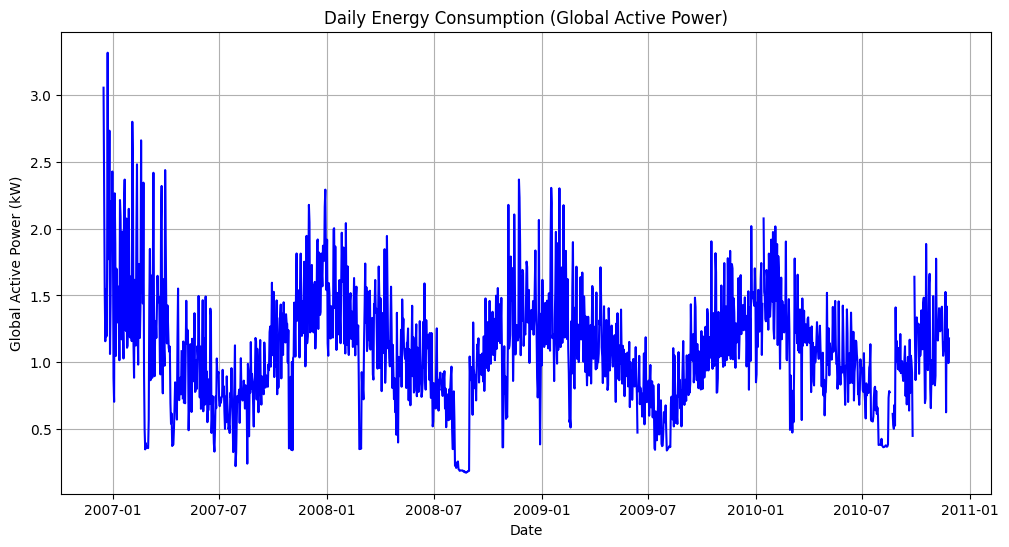

In [10]:
# Plot the daily energy consumption trend
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['Global_active_power'], color='blue')
plt.title('Daily Energy Consumption (Global Active Power)')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.show()

In [11]:
# Get summary statistics

df_daily.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,1.092048,0.123816,240.836421,4.629728,1.123143,1.298620,6.444100
std,0.420415,0.034131,2.045493,1.741352,1.113913,1.461039,2.568978
min,0.173818,0.057811,231.088229,0.808333,0.000000,0.000000,0.000000
25%,0.816776,0.099188,240.094778,3.503333,0.440972,0.299306,4.638889
50%,1.080732,0.119092,240.965688,4.556111,0.775694,0.479167,6.447222
75%,1.323926,0.141454,241.878583,5.540556,1.545139,1.897222,8.155556
max,3.314851,0.290162,247.435007,14.028056,7.767894,8.409028,16.488194


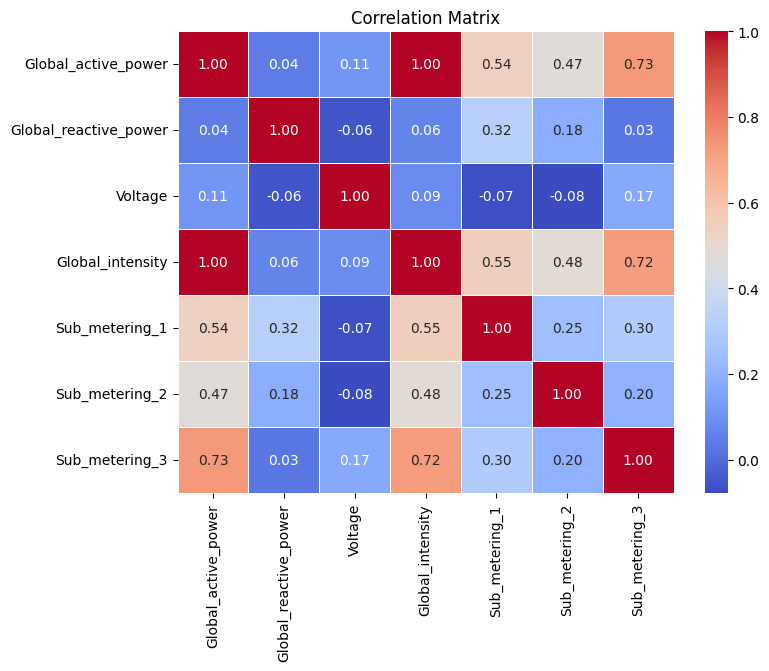

In [12]:
# Correlation Analysis

# Correlation matrix
corr = df_daily.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Boxplot to Visualize Distribution


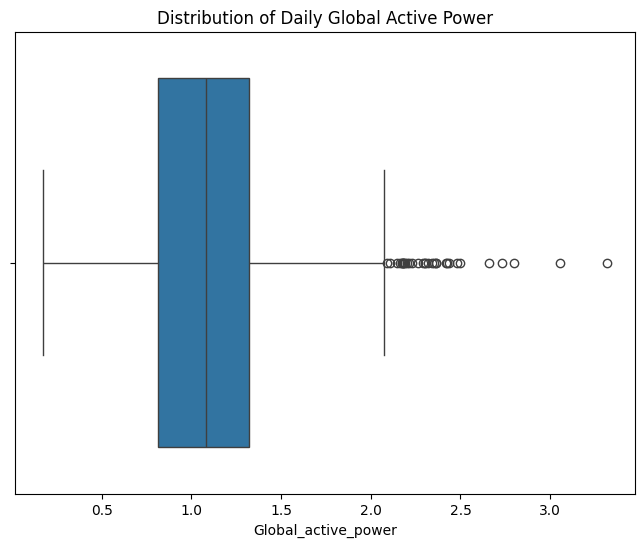

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_daily['Global_active_power'])
plt.title('Distribution of Daily Global Active Power')
plt.show()


# Feature Engineering


In [15]:
# Rolling Averages
df_daily['rolling_3'] = df_daily['Global_active_power'].rolling(window=3).mean()
df_daily['rolling_7'] = df_daily['Global_active_power'].rolling(window=7).mean()


# Lag Features (previous days' usage)
df_daily['lag_1'] = df_daily['Global_active_power'].shift(1)
df_daily['lag_2'] = df_daily['Global_active_power'].shift(2)


# Time-Based Features
df_daily['day_of_week'] = df_daily.index.dayofweek  # 0=Monday, 6=Sunday
df_daily['month'] = df_daily.index.month
df_daily['is_weekend'] = df_daily['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [16]:
df_daily['rolling_3']

Datetime
2006-12-16         NaN
2006-12-17         NaN
2006-12-18    2.312799
2006-12-19    1.680667
2006-12-20    1.411057
                ...   
2010-11-22    1.189688
2010-11-23    1.046292
2010-11-24    1.253546
2010-11-25    1.112256
2010-11-26    1.139829
Freq: D, Name: rolling_3, Length: 1442, dtype: float64

In [17]:
df_daily['rolling_7']

Datetime
2006-12-16         NaN
2006-12-17         NaN
2006-12-18         NaN
2006-12-19         NaN
2006-12-20         NaN
                ...   
2010-11-22    1.136288
2010-11-23    1.143013
2010-11-24    1.164265
2010-11-25    1.142341
2010-11-26    1.154866
Freq: D, Name: rolling_7, Length: 1442, dtype: float64

In [18]:
df_daily['lag_1']

Datetime
2006-12-16         NaN
2006-12-17    3.053475
2006-12-18    2.354486
2006-12-19    1.530435
2006-12-20    1.157079
                ...   
2010-11-22    0.625632
2010-11-23    1.417733
2010-11-24    1.095511
2010-11-25    1.247394
2010-11-26    0.993864
Freq: D, Name: lag_1, Length: 1442, dtype: float64

In [19]:
df_daily['lag_2']

Datetime
2006-12-16         NaN
2006-12-17         NaN
2006-12-18    3.053475
2006-12-19    2.354486
2006-12-20    1.530435
                ...   
2010-11-22    1.525699
2010-11-23    0.625632
2010-11-24    1.417733
2010-11-25    1.095511
2010-11-26    1.247394
Freq: D, Name: lag_2, Length: 1442, dtype: float64

In [20]:
df_daily.dropna(inplace=True)


In [21]:
df_daily['day_of_week']

Datetime
2006-12-22    4
2006-12-23    5
2006-12-24    6
2006-12-25    0
2006-12-26    1
             ..
2010-11-22    0
2010-11-23    1
2010-11-24    2
2010-11-25    3
2010-11-26    4
Name: day_of_week, Length: 1397, dtype: int32

In [22]:
df_daily['month']

Datetime
2006-12-22    12
2006-12-23    12
2006-12-24    12
2006-12-25    12
2006-12-26    12
              ..
2010-11-22    11
2010-11-23    11
2010-11-24    11
2010-11-25    11
2010-11-26    11
Name: month, Length: 1397, dtype: int32

In [23]:
df_daily['is_weekend']

Datetime
2006-12-22    0
2006-12-23    1
2006-12-24    1
2006-12-25    0
2006-12-26    0
             ..
2010-11-22    0
2010-11-23    0
2010-11-24    0
2010-11-25    0
2010-11-26    0
Name: is_weekend, Length: 1397, dtype: int64

# Train-Test Split


In [24]:
# Define Features (X) and Target (y)


In [25]:
# Define target variable
y = df_daily['Global_active_power']

# Drop the leakage-prone feature
X = df_daily.drop(['Global_active_power', 'rolling_3', 'rolling_7', 'lag_1', 'lag_2'], axis=1)


In [26]:
# Split into Train & Test Sets


# Time-based split
split_point = int(len(df_daily) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]


In [27]:
#Feature Scaling :

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# Train a Linear Regression Model


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

Linear Regression Performance:
MAE  = 0.0062
RMSE = 0.0079
R²   = 0.9994


# Random Forest Regressor


In [62]:

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Performance:")
print(f"MAE  = {mae_rf:.4f}")
print(f"RMSE = {rmse_rf:.4f}")
print(f"R²   = {r2_rf:.4f}")

Random Forest Performance:
MAE  = 0.0109
RMSE = 0.0138
R²   = 0.9982


In [64]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

print("Best Random Forest Params:", grid_rf.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
MAE: 0.010960058438388244
RMSE: 0.013977079137489109
R²: 0.9981219882606966


# Gradient Boosting Regressor



In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_gb = gb_model.predict(X_test_scaled)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Performance:")
print(f"MAE  = {mae_gb:.4f}")
print(f"RMSE = {rmse_gb:.4f}")
print(f"R²   = {r2_gb:.4f}")

Gradient Boosting Performance:
MAE  = 0.0093
RMSE = 0.0118
R²   = 0.9987


In [65]:
# Hyperparameter Tuning

from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}

gb = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb, gb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train)

best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)

print("Best Gradient Boosting Params:", grid_gb.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R²:", r2_score(y_test, y_pred_gb))

Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
MAE: 0.009042726949269032
RMSE: 0.011294433304976545
R²: 0.998773706730006


# Support Vector Regressor (SVR)


In [58]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_svr = svr_model.predict(X_test_scaled)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regressor Performance:")
print(f"MAE  = {mae_svr:.4f}")
print(f"RMSE = {rmse_svr:.4f}")
print(f"R²   = {r2_svr:.4f}")

Support Vector Regressor Performance:
MAE  = 0.0487
RMSE = 0.0606
R²   = 0.9647


# Neural Networks (MLPRegressor)


In [59]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_mlp = mlp_model.predict(X_test_scaled)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"Neural Network (MLP) Performance:")
print(f"MAE  = {mae_mlp:.4f}")
print(f"RMSE = {rmse_mlp:.4f}")
print(f"R²   = {r2_mlp:.4f}")

Neural Network (MLP) Performance:
MAE  = 0.0691
RMSE = 0.0869
R²   = 0.9274


In [66]:
# Hyperparameter Tuning

mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'max_iter': [1000],
}

mlp = MLPRegressor(random_state=42)
grid_mlp = GridSearchCV(mlp, mlp_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_mlp.fit(X_train_scaled, y_train)

best_mlp = grid_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test_scaled)

print("Best MLP Params:", grid_mlp.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
print("R²:", r2_score(y_test, y_pred_mlp))

Best MLP Params: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'max_iter': 1000, 'solver': 'adam'}
MAE: 0.04900252581007691
RMSE: 0.06282865081689455
R²: 0.962052696395066


# Visualization 

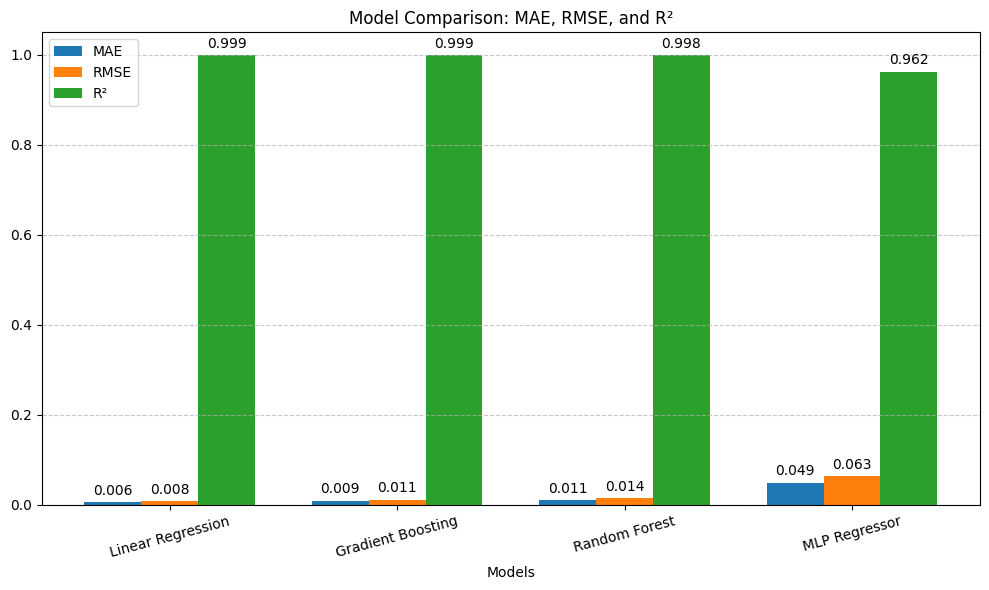

In [67]:
# Model names and their performance metrics
models = ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'MLP Regressor']
mae = [0.0062, 0.0090, 0.0110, 0.0490]
rmse = [0.0079, 0.0113, 0.0140, 0.0628]
r2 = [0.9994, 0.9988, 0.9981, 0.9621]

x = np.arange(len(models))  # label locations
width = 0.25  # bar width

# Create subplots for MAE, RMSE, and R²
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, mae, width, label='MAE')
bars2 = ax.bar(x, rmse, width, label='RMSE')
bars3 = ax.bar(x + width, r2, width, label='R²')

# Labels and formatting
ax.set_xlabel('Models')
ax.set_title('Model Comparison: MAE, RMSE, and R²')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bars1)
annotate_bars(bars2)
annotate_bars(bars3)

plt.tight_layout()
plt.show()

# Cross-Validation of All Models


In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


In [69]:
# List of models (use tuned params where applicable)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=2, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42),
    'MLP Regressor': make_pipeline(StandardScaler(), 
                                   MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)),
    'SVR': make_pipeline(StandardScaler(), SVR())  # scaling important for SVR
}

# Evaluate using 5-fold CV on MAE, RMSE, R²
for name, model in models.items():
    mae = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
    rmse = np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean())
    r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(f"{name} (5-Fold CV):")
    print(f"  MAE  = {mae:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  R²   = {r2:.4f}\n")

Linear Regression (5-Fold CV):
  MAE  = 0.0071
  RMSE = 0.0095
  R²   = 0.9994

Random Forest (5-Fold CV):
  MAE  = 0.0148
  RMSE = 0.0395
  R²   = 0.9936

Gradient Boosting (5-Fold CV):
  MAE  = 0.0123
  RMSE = 0.0366
  R²   = 0.9946

MLP Regressor (5-Fold CV):
  MAE  = 0.0533
  RMSE = 0.0702
  R²   = 0.9695

SVR (5-Fold CV):
  MAE  = 0.0646
  RMSE = 0.1121
  R²   = 0.9366



# Visualize Cross-Validation Results


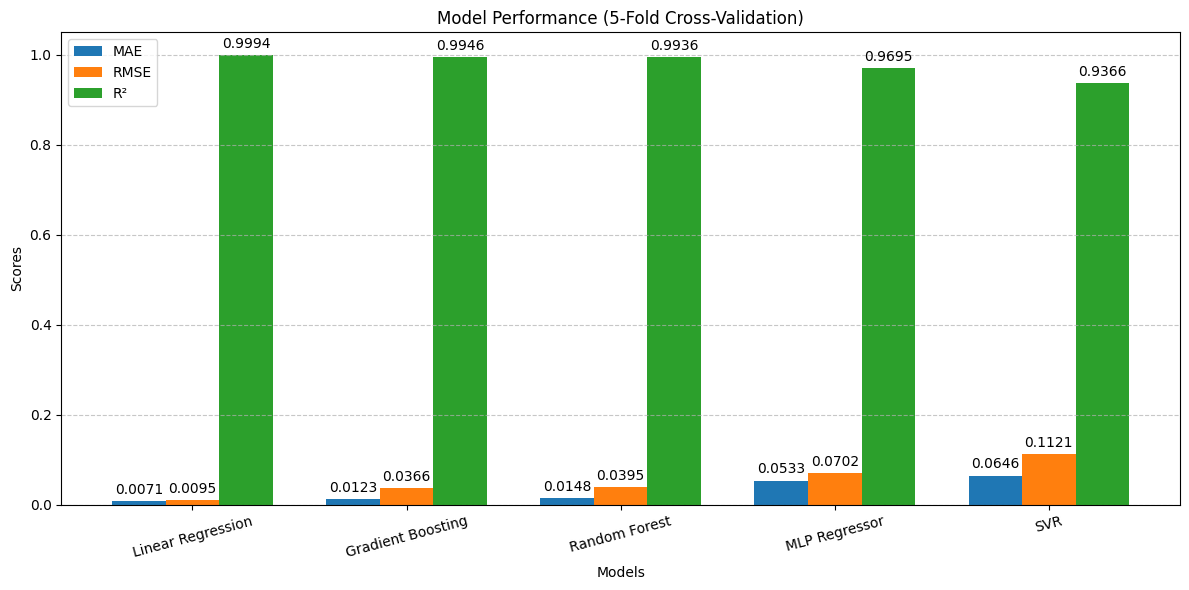

In [71]:
# Model names and their cross-validation metrics
models = ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'MLP Regressor', 'SVR']
mae_cv = [0.0071, 0.0123, 0.0148, 0.0533, 0.0646]
rmse_cv = [0.0095, 0.0366, 0.0395, 0.0702, 0.1121]
r2_cv = [0.9994, 0.9946, 0.9936, 0.9695, 0.9366]

x = np.arange(len(models))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bar plots for MAE, RMSE, and R²
bars1 = ax.bar(x - width, mae_cv, width, label='MAE')
bars2 = ax.bar(x, rmse_cv, width, label='RMSE')
bars3 = ax.bar(x + width, r2_cv, width, label='R²')

# Labels and titles
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('Model Performance (5-Fold Cross-Validation)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values
def annotate(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate(bars1)
annotate(bars2)
annotate(bars3)

plt.tight_layout()
plt.show()
